## Part 1: Building a Linear Regression Model

In this coding example, we will walk through applying and analyzing a linear regression model on the California Housing dataset using the $\texttt{scikit-learn}$ library.

$\texttt{scikit-learn}$, also known as $\texttt{sklearn}$, is a popular open-source machine learning library in Python that provides a wide range of tools and algorithms for various machine learning tasks, including classification, regression, clustering, dimensionality reduction, and more.

In [26]:
import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [27]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

Let's first take a look at the available description.The dataset contains aggregated data regarding each district in California.

In [28]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

Let’s have a close look at the features that can be used by a predictive model as well as the target to be predicted.

In [29]:
housing_df = california_housing.frame
housing_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Problem Statement

Now that we've had an initial look at our dataset, let's formulate the business problem we'd like to solve using this dataset in more detail:

Given data with features on the population, median income, median house age, average number of rooms, average number of bedrooms, average number of members, latitude, and longitude of block groups in California, we would like to build a supervised machine learning model that predicts the median house value for a given block group using regression.

### Data Exploration

Prior to training the model, it helps to explore our data a bit more to deal with any unwanted values and verify that applying a linear regression model is indeed reasonable.

In [30]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Lucky for us, for this dataset we can see that:

- it contains 20,640 samples and 8 features
    
- all features are numerical features encoded as floating number
    
- there are no missing values

Now let's take a look at the statistics for the numeric features of the dataset.

In [31]:
housing_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Another good way to explore this is to plot a histogrom of each numeric feature. A histogram shows you the number of instances (vertical axes) across the given value range (horizontal axes).

array([[<Axes: title={'center': 'MedInc'}>,
        <Axes: title={'center': 'HouseAge'}>,
        <Axes: title={'center': 'AveRooms'}>],
       [<Axes: title={'center': 'AveBedrms'}>,
        <Axes: title={'center': 'Population'}>,
        <Axes: title={'center': 'AveOccup'}>],
       [<Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'MedHouseVal'}>]], dtype=object)

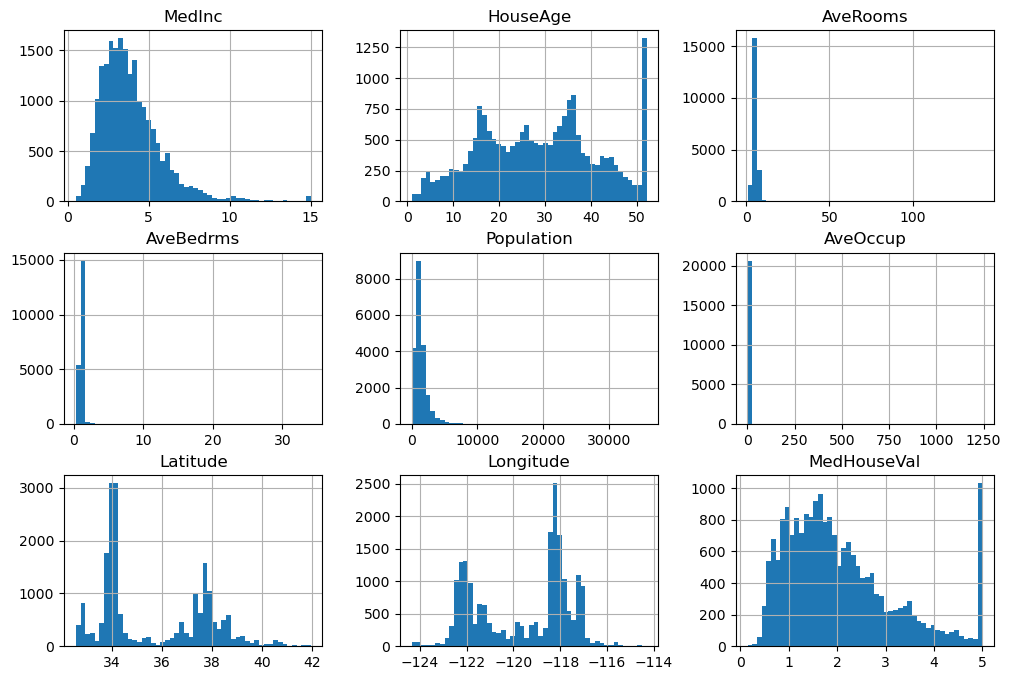

In [32]:
housing_df.hist(bins =50, figsize=(12,8))

From these plots, we notice that:
- The features have varying scales. This could cause the learned model to be biased towards certain features. To prevent this, $\textbf{Feature Scaling}$ is a helpful pre-processing to use.

- Some features are "tail heavy" meaning that they extend further to the right of the median than to the left which makes it harder for an algortihm to detect patterns.

- housing_median_age and the median_house_value seem to be capped. Depending on the specific business problem, you might or might not want your model to learn not to go beyond a certain value.

The insights above can give you guidance on which features to use in your final model and what data preprocessing steps you might need to take.

Speaking of features, although there are 8 usable features in the dataset, it is not necessarily the case that all of the features are meaningful or relevant to the target variable we want to predict. To get a quick understanding of this, we can have a look at the correlation matrix using the $\texttt{corr()}$ method. The calculated coefficients of correlation in the matrix range from 1 to -1. The closer it is to 1 or -1 the more correlated it is. Correlations that are close to 0, means that there is no correlation, neither negative or positive.

In [33]:
#generate a dataframe containing the coefficient of correlation between every attribute in your dataset
correlation = housing_df.corr()
correlation

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [34]:
#Select the column representing the correlation between predictive attributes and our target variable
correlation['MedHouseVal'].sort_values(ascending=False)

MedHouseVal    1.000000
MedInc         0.688075
AveRooms       0.151948
HouseAge       0.105623
AveOccup      -0.023737
Population    -0.024650
Longitude     -0.045967
AveBedrms     -0.046701
Latitude      -0.144160
Name: MedHouseVal, dtype: float64

We can see that the median_income is correlated the most with the median house value. We can quickly visualize this with a scatterplot.

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

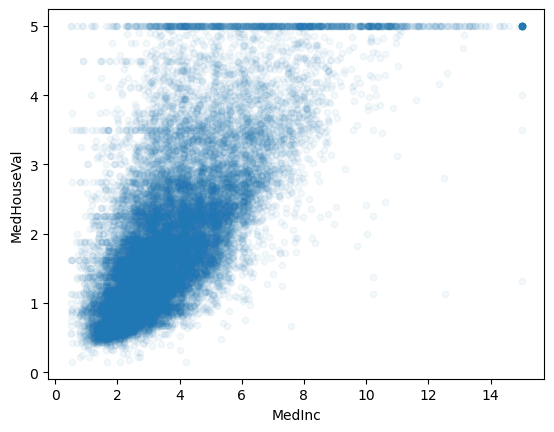

In [35]:
housing_df.plot(kind="scatter", x="MedInc", y="MedHouseVal", alpha=0.05)

The scatterplot reveals that the correlation is indeed very strong, displaying a linear upward trend as well as a noticeable price cap at 5 hundred thousand dollars. For simplicity, in this example we will use only the Median Income feature as our predictor to build a model. The scatter plot can give us an initial confirmation that choosing a Linear Regression model is appropriate for this scenario.

Since we are using only one predictor for a univariate Linear Regression problem, we will leave feature scaling and other extensive data pre-processing for a future coding demo. We will, however, do a naive pre-processing step to remove any samples with a Median House Value above 5 hundred thousand dollars to prevent the price cap from affecting the linear model.

In [36]:
# First, let's select the data we want
housing_df_nocap = housing_df[housing_df['MedHouseVal']<5]

# Next, we will select the predictor and target
X = housing_df_nocap[['MedInc']]
y = housing_df_nocap['MedHouseVal']

As shown above the reason why we do data exploration is to gain insights about our data that we can use when we build our model. Each machine learning model has its inherent assumptions about the data, for example Linear Regression assumes a linear relation. Building a machine Learning model is an iterative process where we repeatedly use our insights to make such assumptions, gain more insights from the model, and refine our assumptions/model until we reach satisfactory results.

Before we move on to training, recall the Train/Test Split protocol, where we use held-out test data to estimate loss on new, unseen data and detect overfitting. The ```train_test_split()``` method from $\texttt{sklearn}$ does this for us.

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [38]:
print(len(X_train), "Train Instances +", len(X_test), "Test Instances")

15718 Train Instances + 3930 Test Instances


### Linear Regression

At this point, we've formulated our problem, explored, pre-processed, and completed a train/test split on our data. Now it's finally time for us to train our Linear Regression model.

In [39]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression() #fit_intercept default True
reg.fit(X_train, y_train)

LinearRegression()

We will evaluate our model using the Mean Absolute Error. The formula for calculating MAE is:

$$MAE = \frac{1}{n} \times \sum_{i=1}^{n}(|(y_{pred})_{i}-(y_{true})_{i}|)$$

It calculates the average absolute difference between the model predicted values and the true values. Other metrics can also be used for evaluation, here we choose MAE since it can be directly interpreted as the error in hundred thousand dollars that our model makes. Let's try it out on the training set first.

In [40]:
from sklearn.metrics import mean_absolute_error

y_pred_train = reg.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_train

0.5621334778424781

Let's also evaluate the model on our test set.

In [41]:
y_pred_test = reg.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
mae_test

0.5727960423580015

As you can see, although the model is not overfitting, the performance on both sets are not that great. In fact, if interepreted directly, our model is off by over half a hundred thousand dollars on average. In such a case, we say that the model is $\textbf{underfitting}$. This either could be because the feature(s) we chose do not provide enough information to make proper predictions or that the model is just not powerful enough to capture the patterns in our data.

In the future, we will revist this dataset using a more powerful model (Decision Trees) which can fit to both linear and non-linear relationships in complex datasets. You are also encouraged to play around with adding more features to the Linear Regression model and see how the performance changes.

## Part 2: Interpreting a Linear Regression Model

Previously, we've trained our Linear Regression Model with Median Income as the predictor and Median House Value as the target and evaluated the model using MAE. Now let's take a closer look at the results and what they imply.

First let's plot the trained model on top of our entire dataset. We will use the $\texttt{matplotlib}$ library for plotting.

Text(0, 0.5, 'Median House Value (Hundred Thousand Dollars)')

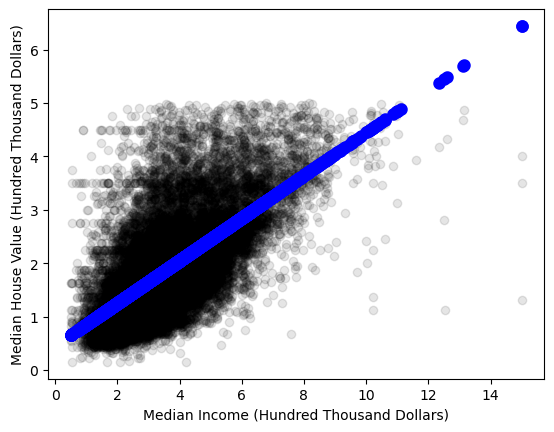

In [42]:
from matplotlib import pyplot as plt

# Plot outputs
plt.scatter(X, y, color="black", alpha=0.1)
plt.scatter(X_train, y_pred_train, color="blue", linewidth=3)
plt.xlabel("Median Income (Hundred Thousand Dollars)")
plt.ylabel("Median House Value (Hundred Thousand Dollars)")

For the univariate case, we can easily visualize and verify that our model is somewhat reasonable. However, it is less straightforward visually for multivariate linear regression models. Aside from plots, we can also gain a better understanding of the results by analyzing the model coefficients. In simple or multiple linear regression, the size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect.

In [43]:
coef = reg.coef_
intercept = reg.intercept_

print("Coefficient(s):", coef)
print("Intercept:", intercept)

Coefficient(s): [0.39944576]
Intercept: 0.4511288100814481
